## MSLA Data analaysis assessment on Employee Analysis
#### Giving Human resource dataset with different attributes of employees


### 0. Importing and reading data


In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
plt.style.use('ggplot')
pd.set_option('max_columns',400)# it enables us view every column in the dataset at once

In [75]:
# loading the dataset
hr = pd.read_csv("Human Resources.csv")

### 1. Understanding the Data

In [76]:
# the size of the data
hr.shape

(37408, 13)

In [77]:
hr.head(10)

,id,first_name,last_name,birthdate,gender,race,department,jobtitle,location,hire_date,termdate,location_city,location_state
0,00-0037846,Kimmy,Walczynski,6/4/1991,Male,Hispanic or Latino,Engineering,Programmer Analyst I,Headquarters,1/20/2002,NaN,Cleveland,Ohio
1,00-0041533,Ignatius,Springett,6/29/1984,Male,White,Business Development,Business Analyst,Headquarters,4/8/2019,NaN,Cleveland,Ohio
2,00-0045747,Corbie,Bittlestone,7/29/1989,Male,Black or African American,Sales,Solutions Engineer Manager,Headquarters,10/12/2010,NaN,Cleveland,Ohio
3,00-0055274,Baxy,Matton,9/14/1982,Female,White,Services,Service Tech,Headquarters,4/10/2005,NaN,Cleveland,Ohio
4,00-0076100,Terrell,Suff,4/11/1994,Female,Two or More Races,Product Management,Business Analyst,Remote,9/29/2010,2029-10-29 06:09:38 UTC,Flint,Michigan
5,00-0116166,Kacie,Offiler,1/18/1971,Male,Asian,Engineering,Developer III,Headquarters,9/1/2018,NaN,Cleveland,Ohio
6,00-0363185,Sandro,Admans,11/19/1979,Male,Two or More Races,Product Management,Quality Engineer,Headquarters,11/8/2012,NaN,Cleveland,Ohio
7,00-0380704,Eugene,Lehrahan,10/14/1988,Female,Black or African American,Engineering,Developer I,Headquarters,6/27/2007,NaN,Cleveland,Ohio
8,00-0381660,Wainwright,Corfield,12/13/1996,Male,Asian,Engineering,Business Systems Development Analyst,Headquarters,2/20/2001,2008-12-05 01:21:48 UTC,Cleveland,Ohio
9,00-0419202,Dyann,Isoldi,3/27/1980,Male,Two or More Races,Engineering,Web Developer I,Headquarters,1/27/2005,NaN,Cleveland,Ohio


In [78]:
#listing the columns
hr.columns

Index(['id', 'first_name', 'last_name', 'birthdate', 'gender', 'race',
       'department', 'jobtitle', 'location', 'hire_date', 'termdate',
       'location_city', 'location_state'],
      dtype='object')

In [79]:
# checking for the datatypes
hr.dtypes

id                object
first_name        object
last_name         object
birthdate         object
gender            object
race              object
department        object
jobtitle          object
location          object
hire_date         object
termdate          object
location_city     object
location_state    object
dtype: object

In [80]:
hr.describe() #display statistics information about the numerical data in the dataset

,id,first_name,last_name,birthdate,gender,race,department,jobtitle,location,hire_date,termdate,location_city,location_state
count,22214,22214,22214,22214,22214,22214,22214,22267,22214,22214,3929,22214,22214
unique,22214,7758,17754,10854,3,7,13,185,2,7016,3929,77,7
top,75-9209739,Cassie,Ducker,5/9/1972,Male,White,Engineering,Research Assistant II,Headquarters,7/6/2009,2003-06-04 19:48:03 UTC,Cleveland,Ohio
freq,1,12,7,9,11288,6328,6686,754,16715,10,1,16871,18025


### 2. Data Preparation
###### * Dropping irrelevant columns and rows
###### * Identifying Duplicated Columns
###### * Renaming Columns
###### * Feature Creation

In [81]:
hr.head()

,id,first_name,last_name,birthdate,gender,race,department,jobtitle,location,hire_date,termdate,location_city,location_state
0,00-0037846,Kimmy,Walczynski,6/4/1991,Male,Hispanic or Latino,Engineering,Programmer Analyst I,Headquarters,1/20/2002,NaN,Cleveland,Ohio
1,00-0041533,Ignatius,Springett,6/29/1984,Male,White,Business Development,Business Analyst,Headquarters,4/8/2019,NaN,Cleveland,Ohio
2,00-0045747,Corbie,Bittlestone,7/29/1989,Male,Black or African American,Sales,Solutions Engineer Manager,Headquarters,10/12/2010,NaN,Cleveland,Ohio
3,00-0055274,Baxy,Matton,9/14/1982,Female,White,Services,Service Tech,Headquarters,4/10/2005,NaN,Cleveland,Ohio
4,00-0076100,Terrell,Suff,4/11/1994,Female,Two or More Races,Product Management,Business Analyst,Remote,9/29/2010,2029-10-29 06:09:38 UTC,Flint,Michigan


In [82]:
# hr.drop

In [83]:
# changing the following columns datatypes
hr['birthdate'] = pd.to_datetime(hr['birthdate'])
hr['hire_date'] = pd.to_datetime(hr['hire_date'])
hr['termdate'] = pd.to_datetime(hr['termdate'])

In [84]:
hr.dtypes

id                             object
first_name                     object
last_name                      object
birthdate              datetime64[ns]
gender                         object
race                           object
department                     object
jobtitle                       object
location                       object
hire_date              datetime64[ns]
termdate          datetime64[ns, UTC]
location_city                  object
location_state                 object
dtype: object

In [85]:
# checking for missing values
hr.isna().sum()

id                15194
first_name        15194
last_name         15194
birthdate         15194
gender            15194
race              15194
department        15194
jobtitle          15141
location          15194
hire_date         15194
termdate          33479
location_city     15194
location_state    15194
dtype: int64

In [86]:
#checking for duplicated data
hr.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
37403     True
37404     True
37405     True
37406     True
37407     True
Length: 37408, dtype: bool

In [87]:
hr.loc[hr.duplicated(subset=['first_name'])]

,id,first_name,last_name,birthdate,gender,race,department,jobtitle,location,hire_date,termdate,location_city,location_state
189,00-8712138,Gabie,Lawleff,1968-08-30,Female,Hispanic or Latino,Training,Senior Trainer,Remote,2004-05-10,NaT,Dayton,Ohio
214,00-9519379,Lorianna,Hayley,1993-05-30,Male,Two or More Races,Engineering,Programmer IV,Headquarters,2012-10-01,NaT,Cleveland,Ohio
233,01-0348994,Wainwright,Osban,1987-05-14,Male,Native Hawaiian or Other Pacific Islander,Sales,Solutions Engineer Manager,Remote,2001-11-14,NaT,Fort Wayne,Indiana
248,01-0770833,Louise,Spottiswoode,1993-02-22,Male,Asian,Sales,Solutions Engineer Manager,Headquarters,2019-05-14,2028-02-11 16:18:48+00:00,Cleveland,Ohio
255,01-1215079,Maribelle,Shankster,1996-08-02,Male,American Indian or Alaska Native,Human Resources,Human Resources Analyst,Remote,2012-10-10,2025-01-15 18:21:59+00:00,Bethlehem,Pennsylvania
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37403,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
37404,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
37405,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
37406,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN


In [88]:
hr.duplicated(subset=['id','first_name','last_name','birthdate','gender','race','department','jobtitle','location','hire_date','termdate','location_city','location_state']).sum()

15190

In [89]:
# Removing the duplicates
~hr.duplicated(subset=['id','first_name','last_name','birthdate','gender','race','department','jobtitle','location','hire_date','termdate','location_city','location_state']).sum()

-15191

In [90]:
~hr.duplicated(subset=['id','first_name','last_name','birthdate','gender','race','department','jobtitle','location','hire_date','termdate','location_city','location_state'])

0         True
1         True
2         True
3         True
4         True
         ...  
37403    False
37404    False
37405    False
37406    False
37407    False
Length: 37408, dtype: bool

In [91]:
hr = hr.loc[~hr.duplicated(subset=['id','first_name','last_name','birthdate','gender','race','department','jobtitle','location','hire_date','termdate','location_city','location_state'])].reset_index(drop=True).copy()

In [92]:
hr

,id,first_name,last_name,birthdate,gender,race,department,jobtitle,location,hire_date,termdate,location_city,location_state
0,00-0037846,Kimmy,Walczynski,1991-06-04,Male,Hispanic or Latino,Engineering,Programmer Analyst I,Headquarters,2002-01-20,NaT,Cleveland,Ohio
1,00-0041533,Ignatius,Springett,1984-06-29,Male,White,Business Development,Business Analyst,Headquarters,2019-04-08,NaT,Cleveland,Ohio
2,00-0045747,Corbie,Bittlestone,1989-07-29,Male,Black or African American,Sales,Solutions Engineer Manager,Headquarters,2010-10-12,NaT,Cleveland,Ohio
3,00-0055274,Baxy,Matton,1982-09-14,Female,White,Services,Service Tech,Headquarters,2005-04-10,NaT,Cleveland,Ohio
4,00-0076100,Terrell,Suff,1994-04-11,Female,Two or More Races,Product Management,Business Analyst,Remote,2010-09-29,2029-10-29 06:09:38+00:00,Flint,Michigan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22213,99-9963543,Carroll,Chattaway,1999-07-10,Female,White,Engineering,Software Engineer III,Remote,2018-03-27,NaT,Fort Wayne,Indiana
22214,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
22215,NaN,NaN,NaN,NaT,NaN,NaN,NaN,Support Staff II,NaN,NaT,NaT,NaN,NaN
22216,NaN,NaN,NaN,NaT,NaN,NaN,NaN,Assistant Manager,NaN,NaT,NaT,NaN,NaN


In [93]:
# checking for missing values
hr.isnull().sum()

id                    4
first_name            4
last_name             4
birthdate             4
gender                4
race                  4
department            4
jobtitle              1
location              4
hire_date             4
termdate          18289
location_city         4
location_state        4
dtype: int64

In [94]:
hr.tail()

,id,first_name,last_name,birthdate,gender,race,department,jobtitle,location,hire_date,termdate,location_city,location_state
22213,99-9963543,Carroll,Chattaway,1999-07-10,Female,White,Engineering,Software Engineer III,Remote,2018-03-27,NaT,Fort Wayne,Indiana
22214,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
22215,NaN,NaN,NaN,NaT,NaN,NaN,NaN,Support Staff II,NaN,NaT,NaT,NaN,NaN
22216,NaN,NaN,NaN,NaT,NaN,NaN,NaN,Assistant Manager,NaN,NaT,NaT,NaN,NaN
22217,NaN,NaN,NaN,NaT,NaN,NaN,NaN,Support Staff III,NaN,NaT,NaT,NaN,NaN


In [95]:
# dropping missing values
hr = hr.drop([22214,22215,22216,22217], axis = 0)

In [96]:
hr.isnull().sum()

id                    0
first_name            0
last_name             0
birthdate             0
gender                0
race                  0
department            0
jobtitle              0
location              0
hire_date             0
termdate          18285
location_city         0
location_state        0
dtype: int64

In [97]:
# hr = hr.dropna(subset =['termdate'], inplace=True)

In [98]:
hr

,id,first_name,last_name,birthdate,gender,race,department,jobtitle,location,hire_date,termdate,location_city,location_state
0,00-0037846,Kimmy,Walczynski,1991-06-04,Male,Hispanic or Latino,Engineering,Programmer Analyst I,Headquarters,2002-01-20,NaT,Cleveland,Ohio
1,00-0041533,Ignatius,Springett,1984-06-29,Male,White,Business Development,Business Analyst,Headquarters,2019-04-08,NaT,Cleveland,Ohio
2,00-0045747,Corbie,Bittlestone,1989-07-29,Male,Black or African American,Sales,Solutions Engineer Manager,Headquarters,2010-10-12,NaT,Cleveland,Ohio
3,00-0055274,Baxy,Matton,1982-09-14,Female,White,Services,Service Tech,Headquarters,2005-04-10,NaT,Cleveland,Ohio
4,00-0076100,Terrell,Suff,1994-04-11,Female,Two or More Races,Product Management,Business Analyst,Remote,2010-09-29,2029-10-29 06:09:38+00:00,Flint,Michigan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22209,99-9797418,Dorella,Garvan,1998-07-08,Female,Hispanic or Latino,Research and Development,Research Assistant I,Headquarters,2012-02-08,NaT,Cleveland,Ohio
22210,99-9869877,Dasie,Thorsby,2001-04-19,Female,Two or More Races,Services,Service Manager,Headquarters,2017-10-06,NaT,Cleveland,Ohio
22211,99-9919822,Nerty,Wilding,1970-02-09,Female,Two or More Races,Training,Junior Trainer,Headquarters,2001-02-08,NaT,Cleveland,Ohio
22212,99-9960380,Mabelle,Dawks,1985-09-02,Male,Two or More Races,Accounting,Staff Accountant I,Headquarters,2005-04-03,2012-12-10 14:29:59+00:00,Cleveland,Ohio


### 3. Feature Engineering

In [99]:
hr['jobtitle'].unique()

array(['Programmer Analyst I', 'Business Analyst',
       'Solutions Engineer Manager', 'Service Tech', 'Developer III',
       'Quality Engineer', 'Developer I',
       'Business Systems Development Analyst', 'Web Developer I',
       'Service Tech II', 'Research Assistant II', 'Analyst Programmer',
       'Staff Accountant III', 'Software Engineer I', 'Senior Attorney',
       'Data Visualization Specialist', 'Senior Editor',
       'Software Consultant', 'Financial Analyst', 'Service Manager',
       'Senior Recruiter', 'HR Manager', 'Trainer III', 'Programmer III',
       'Training Manager', 'Pre-Sales Consultant', 'Data Coordiator',
       'Administrative Assistant II', 'Relationshiop Manager',
       'Human Resources Analyst', 'Desktop Support Technician',
       'Operator', 'Tax Accountant', 'Service Tech III',
       'Senior Developer', 'Service Coordinator', 'Senior Trainer',
       'Research Assistant I', 'Support Staff II',
       'Systems Administrator I', 'Content Develope

<AxesSubplot:title={'center':'Employees Job titles'}>

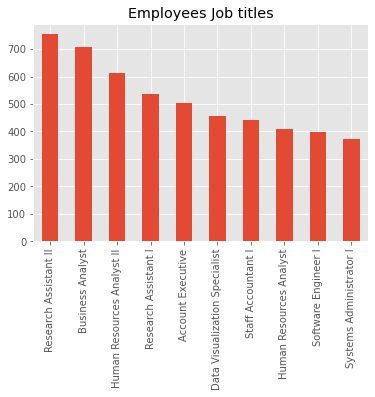

In [104]:
hr['jobtitle'].value_counts() \
.head(10) \
.plot(kind='bar', title="Employees Job titles")

In [108]:
# check for the number of employees by location
employees_by_location = hr.location.value_counts()
employees_by_location

Headquarters    16715
Remote           5499
Name: location, dtype: int64

<AxesSubplot:>

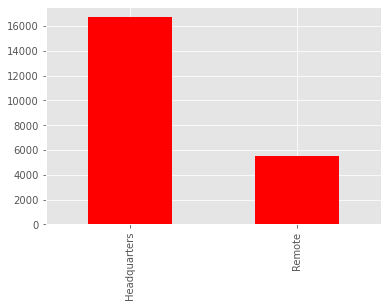

In [109]:
employees_by_location.plot(kind='bar', color ='red')

In [110]:
# Checking the city with the highest emoloyees
employees_by_locationcity = hr.location_city.value_counts()
employees_by_locationcity[:20]

Cleveland       16871
Chicago           351
Philadelphia      326
Pittsburgh        293
Cincinnati        285
Louisville        228
Detroit           203
Dayton            202
Indianapolis      200
Lexington         199
Columbus          177
Springfield       168
Milwaukee         168
Fort Wayne        143
Madison           141
Toledo            131
Peoria            131
Akron             129
Evansville        115
Erie              108
Name: location_city, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='location_city', ylabel='Density'>

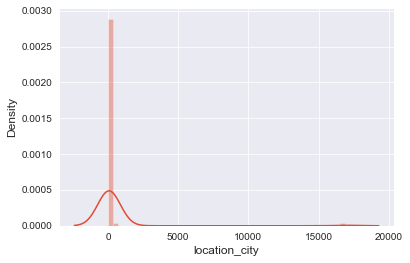

In [111]:
sns.set_style('darkgrid')
sns.distplot(employees_by_locationcity)

<AxesSubplot:ylabel='race'>

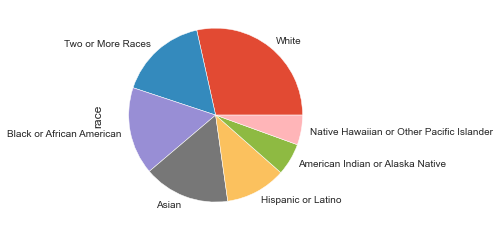

In [116]:
# Most occuring rj
hr['race'].value_counts() \
.plot(kind='pie')

## 